In [29]:
# import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
# read in data
network_df = pd.read_csv('Data/Network 1.csv')

# print first 5 rows
network_df.head()

,Page,Links To
0,A,A;B;C
1,B,A;C
2,C,B


In [24]:
# convert the read in network dataframe into an adjacency list

# create an empty dictionary
adjacency_list = {}

# loop through the dataframe
for index, row in network_df.iterrows():
    # get the source and target nodes
    page = row['Page']
    links = row['Links To']

    # split links into a list by ";"
    links = links.split(';')
    
    # if the page is not in the dictionary, add it
    if page not in adjacency_list:
        adjacency_list[page] = links

# print the adjacency list
adjacency_list

{'A': ['A', 'B', 'C'], 'B': ['A', 'C'], 'C': ['B']}

In [25]:
# create a new dictionary to store the pagerank values of all the pages
pagerank = {}

# prefill the dictionary with 1.0 for all the pages
for page in adjacency_list:
    pagerank[page] = 1.0

# print the pagerank dictionary
pagerank

{'A': 1.0, 'B': 1.0, 'C': 1.0}

In [26]:
# calculate the pagerank values for all the pages

# set the damping factor
damping_factor = 0.85

# set change factor
change_factor = float('inf')

# keep updating the pagerank values until the change factor is less than 0.01
while change_factor > 0.01:

    # create a copy of the current pagerank dictionary
    old_pagerank = pagerank.copy()

    # loop through each item in the pagerank dictionary
    for page in pagerank:

        raw_score = 0

        # check which pages link to the current page
        for parent in adjacency_list:

            if page in adjacency_list[parent]:
                raw_score += pagerank[parent] / len(adjacency_list[parent])


        # calculate the pagerank value for the page
        pagerank[page] = (1 - damping_factor) + damping_factor * raw_score

    # calculate the change factor from the old and new pagerank values, pick the largest change
    local_max_change_factor = 0
    for page in pagerank:
        change_factor = abs(pagerank[page] - old_pagerank[page]) / old_pagerank[page]
        if change_factor > local_max_change_factor:
            local_max_change_factor = change_factor

    # update the global change factor
    if local_max_change_factor < change_factor:
        change_factor = local_max_change_factor

# print the pagerank dictionary
pagerank

{'A': 0.9215520833333333, 'B': 1.1944256944444445, 'C': 0.91873734375}

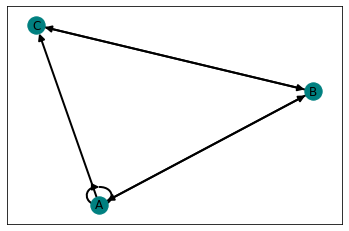

In [52]:
# initialize the networkx graph object
network_graph = nx.DiGraph()

# add vertices to the graph from the adjacency list
for page in adjacency_list:
    network_graph.add_node(page)

# add edges to the graph from the adjacency list
for page in adjacency_list:
    
        for link in adjacency_list[page]:
            network_graph.add_edge(page, link)

# visualize the network graph as a directed graph

# set the graph options
options = {
    'node_color': 'teal',
    'node_size': 300,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 13,
}

# draw the graph
nx.draw_networkx(network_graph, with_labels=True, arrows=True, **options)